### HIGH DIMENSIONAL ANALYSIS
### Programming Excercise: 01
### Name: Nguyễn Phú Thành
### Student Code: 18110014

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [2]:
data = pd.read_csv(
    'room-temperature.csv', 
    parse_dates = True, 
    date_parser = lambda s: datetime.datetime.strptime(s, '%m/%d/%Y %H:%M'),
    index_col = 'Date'
)

In [3]:
data.head()

,FrontLeft,FrontRight,BackLeft,BackRight
Date,,,,
2010-04-11 11:30:00,295.2,297.0,295.8,296.3
2010-04-11 12:00:00,296.2,296.4,296.2,296.3
2010-04-11 12:30:00,297.3,297.5,296.7,297.1
2010-04-11 13:00:00,295.9,296.7,297.4,297.0
2010-04-11 13:30:00,297.2,296.5,297.6,297.4


## a) Plot a time series plot for each type of temperature data: FrontLeft, FrontRight, BackLeft and BackRight.

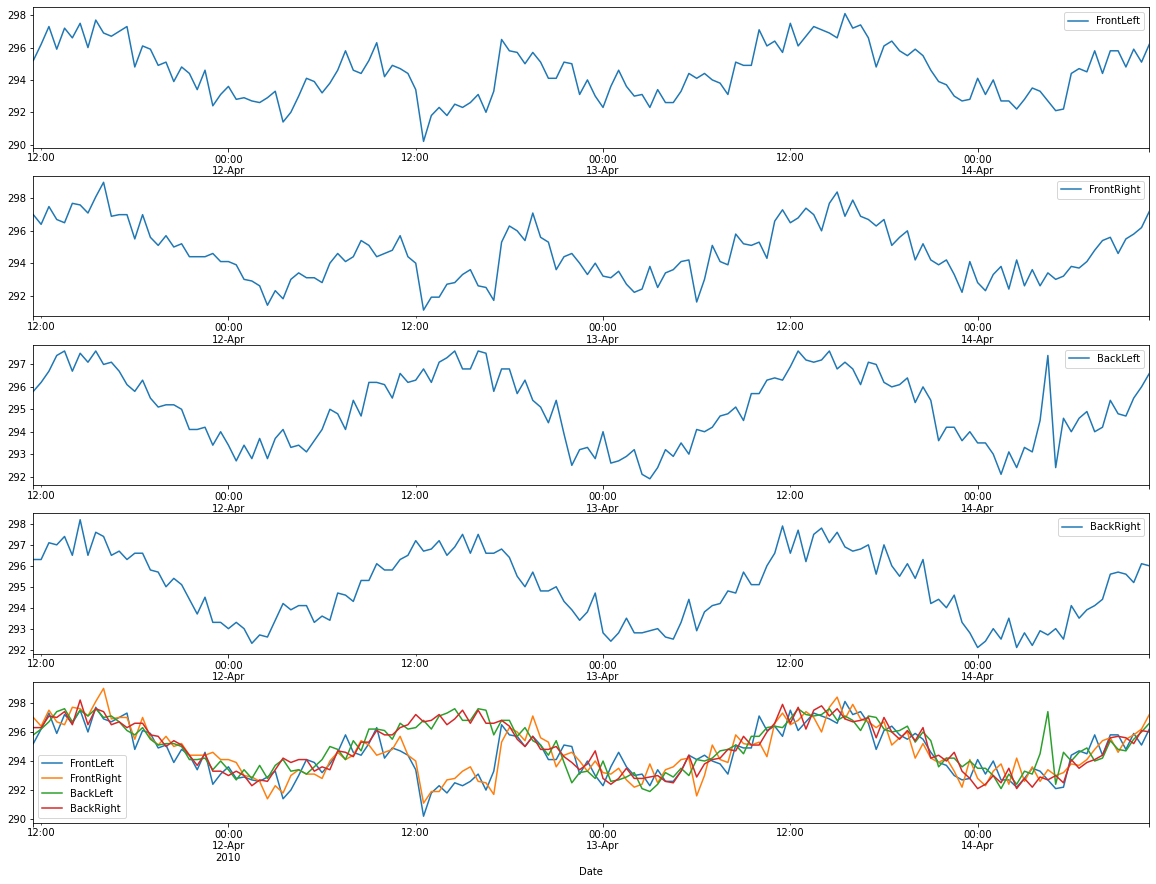

In [4]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (20, 15))

for i, col_name in enumerate(('FrontLeft', 'FrontRight', 'BackLeft', 'BackRight')):
    data[[col_name]].plot(ax = axes[i])
    data[[col_name]].plot(ax = axes[-1])
fig.savefig('Plot_a.jpg')

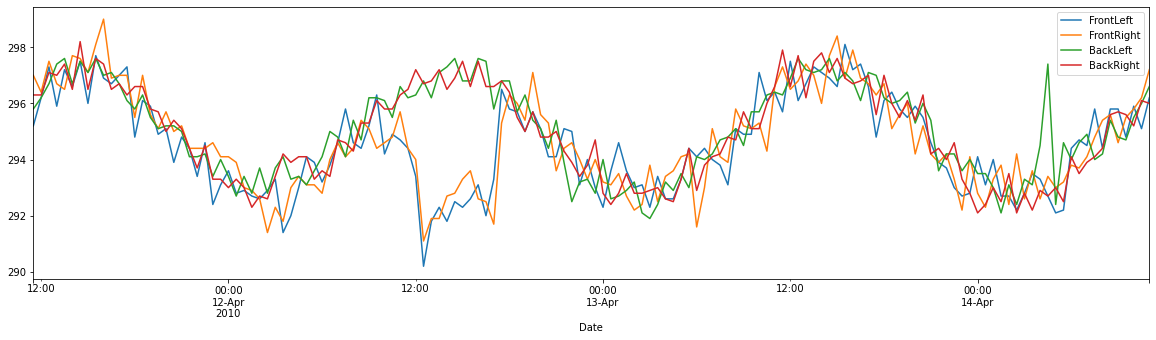

In [5]:
fig, ax = plt.subplots(figsize = (20, 5))

for i, col_name in enumerate(('FrontLeft', 'FrontRight', 'BackLeft', 'BackRight')):
    data[[col_name]].plot(ax = ax)
fig.savefig('Plot_all.jpg')

## b) Implement the PCA algorithm to the whole data set

In [6]:
class PCA:
    def __init__(self, number_components = None):
        self.nb_combonents = number_components
    def fit(self, X):
        number_samples, dimension = X.shape[:2]
        vec_ones = np.ones((number_samples, 1), dtype = float)
        
        # Zero center matrix input
        self.mean = X.mean(axis = 0).reshape((-1, 1))
        X = X - vec_ones.dot(self.mean.T)
        
        S = 1/(number_samples - 1) * X.T.dot(X)
        eigenvalues, eigenvecs = np.linalg.eigh(S)
        
        '''
            Nếu number combonents là None -> Lấy toàn bộ vectơ riêng, trị riêng
            Ngược lại, lấy k = number combonents các vectơ riêng ứng với k trị riêng lớn nhất.
            Vì hàm np.linalg.eigh trả về trị riêng, vectơ riêng theo chiều tăng dần các trị riêng nên
            ta phải lật ngược thứ tự của eigenvalues và eigenvecs
        '''
        eigenvalues, eigenvecs = eigenvalues[::-1], eigenvecs[:, ::-1]
        
        if self.nb_combonents is None:
            self.W = eigenvecs.T
            self.eigenvalues = eigenvalues
        else:
            self.W = eigenvecs[:, :self.nb_combonents].T
            self.eigenvalues = eigenvalues[:self.nb_combonents]
        
        return self
        
    def transform(self, X):
        if len(X.shape) == 1:
            X = X.reshape((1, -1))
        number_samples, dimension = X.shape[:2]
        vec_ones = np.ones((number_samples, 1), dtype = float)
        # Apply the same transformation and project it by W.T
        return (X - vec_ones.dot(self.mean.T)).dot(self.W.T)

In [7]:
X = data.to_numpy()

In [8]:
pca = PCA(number_components = None).fit(X)

In [9]:
pca.transform(X)[:5, :]

array([[-2.61085694,  0.4337286 , -1.15223184,  0.25532328],
       [-2.97578443,  0.43562327,  0.00488095,  0.03642985],
       [-4.7400428 ,  0.85268572,  0.02948437,  0.18757875],
       [-3.90425817, -0.55899399, -0.35440814, -0.32354842],
       [-4.73719634, -0.30168213,  0.71249896, -0.14546453]])

## c) After observing these time series plot in a), how many latent variables should we use for the PCA algorithm to keep the most meaningful information? Apply the PCA for the temperature data by your chosen number of latent variables.

### Số lượng PC chọn là 2. Lý do chọn được giải thích trong file báo cáo

In [10]:
pca = PCA(number_components = 2).fit(X)

In [11]:
X_transformed = pca.transform(X)

In [12]:
X_transformed[:5, :]

array([[-2.61085694,  0.4337286 ],
       [-2.97578443,  0.43562327],
       [-4.7400428 ,  0.85268572],
       [-3.90425817, -0.55899399],
       [-4.73719634, -0.30168213]])

In [13]:
data['Component 1'] = X_transformed[:, 0]
data['Component 2'] = X_transformed[:, 1]

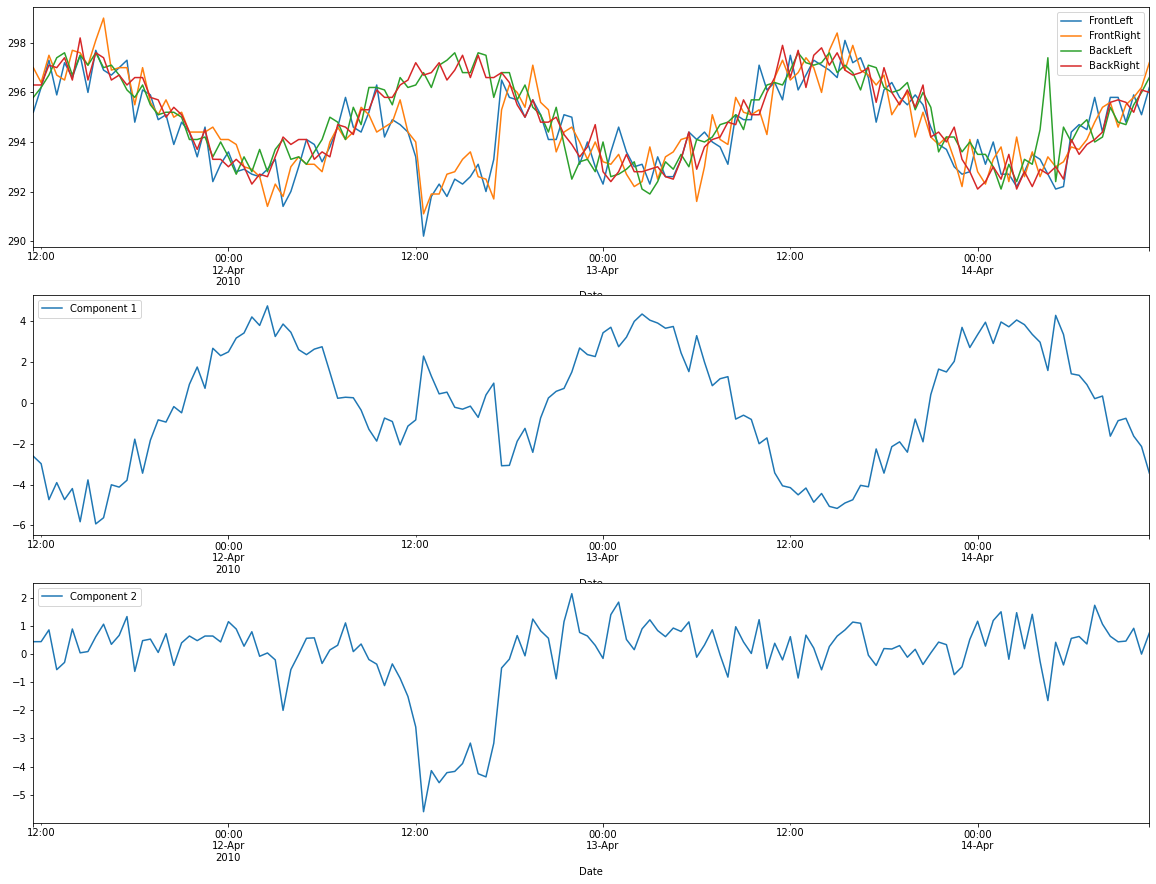

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 15))

for i, col_name in enumerate(('FrontLeft', 'FrontRight', 'BackLeft', 'BackRight')):
    data[[col_name]].plot(ax = axes[0])

data[['Component 1']].plot(ax = axes[1])
data[['Component 2']].plot(ax = axes[2])
fig.savefig('Plot_c.jpg')

## So sánh với hàm thư viện

In [15]:
from sklearn.decomposition import PCA as PCA_sklearn

In [16]:
pca_sklearn = PCA_sklearn(n_components = 2, svd_solver = 'full').fit(X)

In [17]:
X_transform_sklearn = pca_sklearn.transform(X)

In [18]:
X_transform_sklearn[:5, :]

array([[ 2.61085694, -0.4337286 ],
       [ 2.97578443, -0.43562327],
       [ 4.7400428 , -0.85268572],
       [ 3.90425817,  0.55899399],
       [ 4.73719634,  0.30168213]])

In [19]:
X_transformed[:5, :]

array([[-2.61085694,  0.4337286 ],
       [-2.97578443,  0.43562327],
       [-4.7400428 ,  0.85268572],
       [-3.90425817, -0.55899399],
       [-4.73719634, -0.30168213]])

### Kết quả của hàm thư viện với kết quả hàm tự cài đặt là giống nhau (ngược chiều)